<center>
<img src="https://raw.githubusercontent.com/PinkWink/DataScience/master/img/title.jpg" width="200" height="200"><br>
</center>

# 7장-시계열 데이터를 다뤄보자


데이터를 다룬다는 말 속엔 다양한 분야와 응용을 담고 있다. 그런데 데이터가 시간의 흐름에 따라 변화하는 추이가 있는 데이터, 대표적으로 웹트래픽이나 주식같은 데이터를 예측해야 할 때가 있다.
시계열 분석이라는 것은 통계적으로 어렵고 복잡하다. 원 데이터의 안정성을 판정하고, 안정한 형태로 변환하고, 예측 모델을 선정하고 검증하는 과정이 통계학의 깊은 지식을 요구한다.
하지만 여기서 유용한 도구를 하나 소개하겠다. 바로 페이스북에서 만든 fbprophet 이라는 모듈이다.

## 7-1 Numpy의 polyfit으로 회귀 분석하기


In [7]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

이번 장에서 사용할 모듈을 미리 설치해야한다. pip install pandas_datareader를 설치하자.


In [9]:
# import platform
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


In [10]:
pinkwink_web = pd.read_csv('/home/jaeyoon89/DataScience/data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


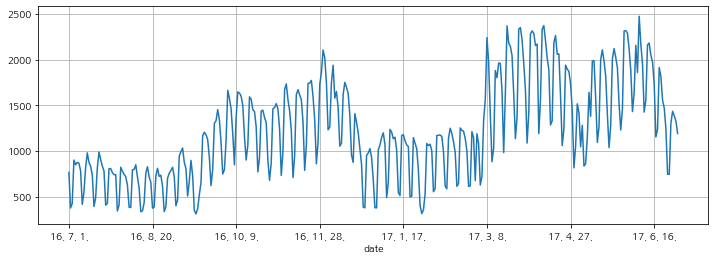

In [12]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

단순하게 2016년 7월 1일부터 2017년 6월 16일 까지 유입량을 그려봤다. 어떤 주기성이 있을 것 같은데 시간 순으로 되어 있는 데이터를 그냥 봐서는 정확하게 잘 모른다. 물론 유심히 관찰하면 2016년 11월 28일 부터 2017년 4월 27일 정도로 약  6개우